# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_url = f"{url}&q={cities[0]}"

requests.get(city_url).json()

{'cod': '404', 'message': 'city not found'}

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities 
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | leduc
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | papao
Processing Record 11 of Set 1 | arys
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | aras-asan
Processing Record 16 of Set 1 | kapa'a
Processing Record 17 of Set 1 | mount pearl
Processing Record 18 of Set 1 | lucea
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | giovinazzo
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.31,64,100,16.36,TF,1691013849
1,blackmans bay,-43.0167,147.3167,10.07,73,100,4.09,AU,1691013849
2,leduc,53.2668,-113.5520,25.09,56,57,4.11,CA,1691013850
3,georgetown,5.4112,100.3354,26.96,89,20,0.00,MY,1691013675
4,bethel,41.3712,-73.4140,26.46,47,0,2.06,US,1691013850


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.31,64,100,16.36,TF,1691013849
1,blackmans bay,-43.0167,147.3167,10.07,73,100,4.09,AU,1691013849
2,leduc,53.2668,-113.5520,25.09,56,57,4.11,CA,1691013850
3,georgetown,5.4112,100.3354,26.96,89,20,0.00,MY,1691013675
4,bethel,41.3712,-73.4140,26.46,47,0,2.06,US,1691013850


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

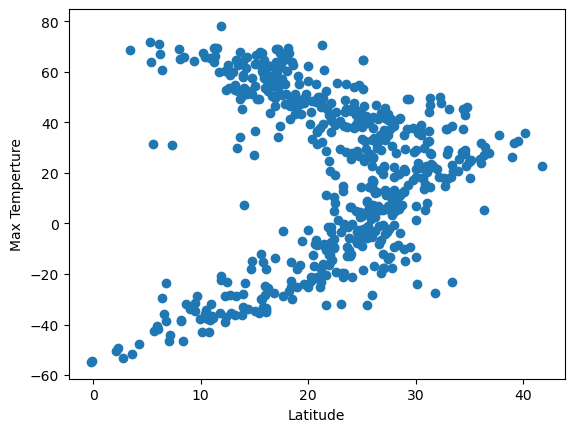

In [53]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

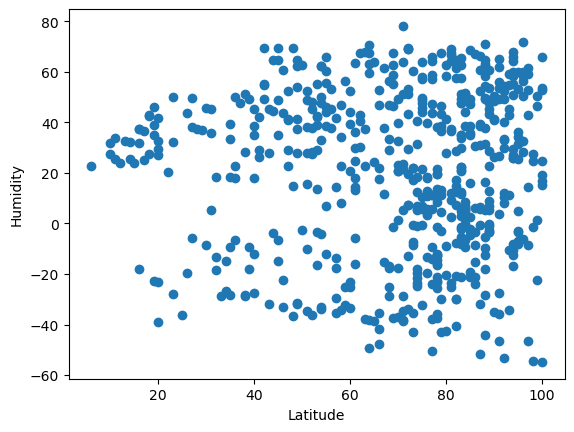

In [54]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

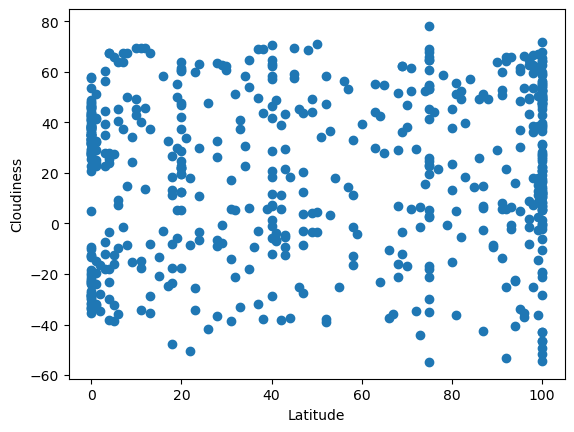

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

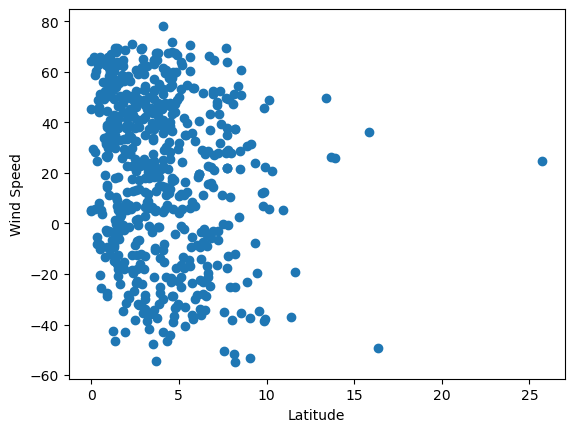

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
def linear_regress(x, y, eqn_coordinates): #eqn_coordinates is a tuple representing coordinates
    #st.pearsonr is used to calculate correlation coefficient and p-value
    r = st.pearsonr(x, y)
    print(f"The r-value is {r[0]}")

    #Linear Regression, slope, intercept
    (slope, intercept, rvalue, pvalue, stderr)=st.linregress (x,y)

    #generate the regression line
    regress_values = x*slope + intercept

    #create equation of regression line
    line_eq = f"y={slope:2f}x + {intercept:2f}"

    #Plotting regression_line
    plt.plot(x,regress_values, "r-")

    #annotation the equation
    #plt.annotate(line_eq, eqn_coordinates)

    #plot the data points
    plt.scatter(x,y)

    #set labels
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,leduc,53.2668,-113.5520,25.09,56,57,4.11,CA,1691013850
3,georgetown,5.4112,100.3354,26.96,89,20,0.00,MY,1691013675
4,bethel,41.3712,-73.4140,26.46,47,0,2.06,US,1691013850
5,tiksi,71.6872,128.8694,5.25,96,100,4.62,RU,1691013851
9,arys,42.4252,68.7950,27.01,18,0,3.79,KZ,1691013853


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.31,64,100,16.36,TF,1691013849
1,blackmans bay,-43.0167,147.3167,10.07,73,100,4.09,AU,1691013849
6,west island,-12.1568,96.8225,23.99,78,40,8.23,CC,1691013790
7,adamstown,-25.0660,-130.1015,21.11,68,92,8.18,PN,1691013852
8,papao,-17.7500,-149.5500,27.82,68,11,5.29,PF,1691013852


###  Temperature vs. Latitude Linear Regression Plot

In [17]:
import scipy.stats as st
from scipy.stats import linregress


The r-value is: -0.660285475360246


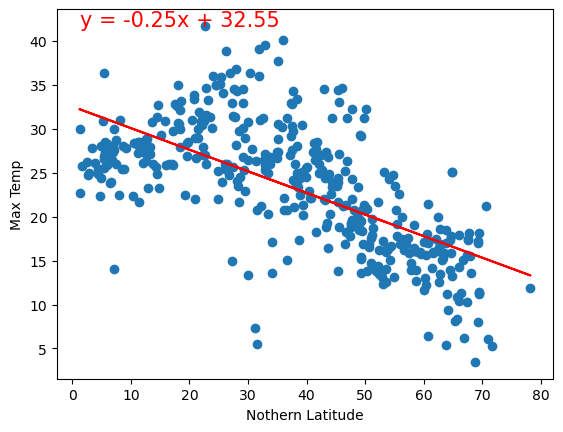

In [59]:
#Linear regression of the nothern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# The correlation coefficient (r value) is stored in the variable 'rvalue'
print("The r-value is:",rvalue)

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
plt.xlabel("Nothern Latitude")
plt.ylabel("Max Temp")
plt.show()


DISCUSSION OF RELATIONSHIP: There is a very strong relationship between the Temperature and Latitude with a correlation coefficient of -0.6603 on the Nothern Latitude 


The r-value is:0.8103235212259424


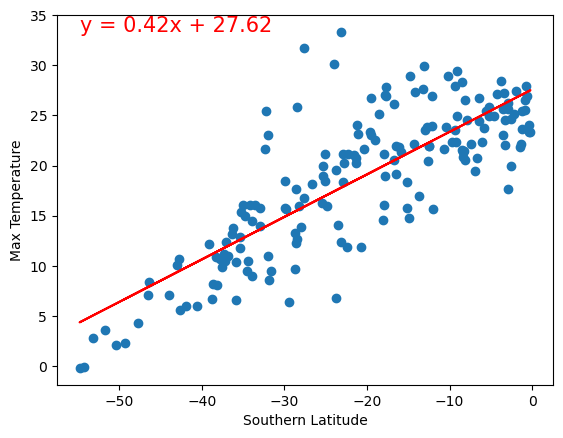

In [30]:
#Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP:
There is a very strong relationship between the Temperature and Latitude with a correlation coefficient of 0.8103 on the Southern Latitude 



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002675970764269948


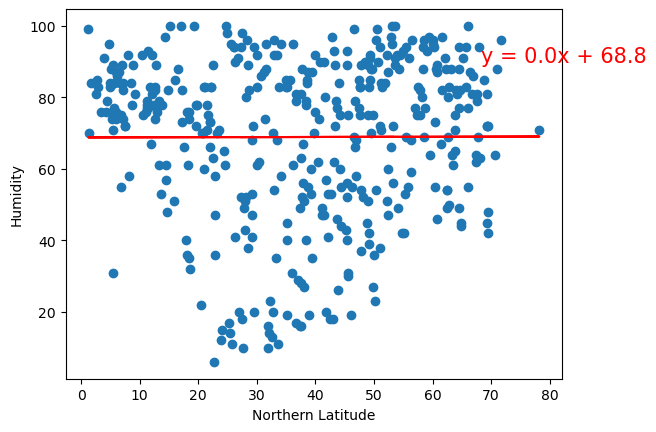

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

Discussion of Relationship: There is a very weak relationship between the Humidity and Latitude with a correlation coefficient of 0.0027 on the Nothern Latitude 

The r-value is: 0.08505496141610648


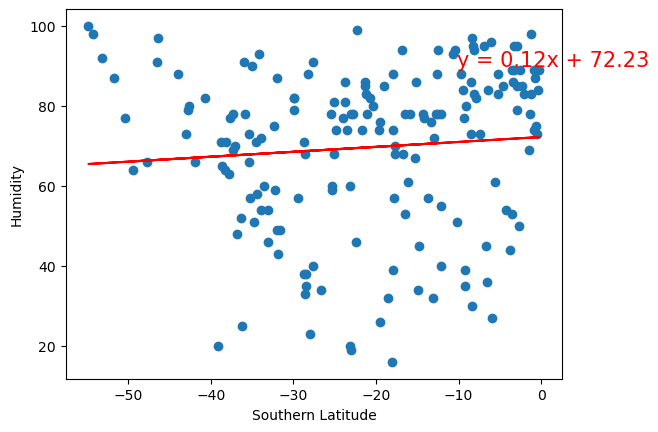

In [41]:
# Southern Hemisphere
# YOUR CODE HERE
#Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP: Discussion of Relationship: There is a weak relationship between the Humidity and Latitude with a correlation coefficient of 0.0851 on the Southern Latitude .


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03274127640703944


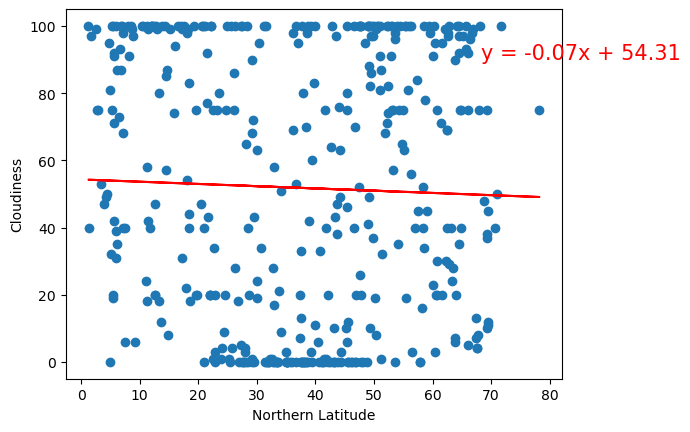

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP: Discussion of Relationship: There is a very weak relationship between the Cloudiness and Latitude with a correlation coefficient of -0.0327 on the Northern Latitude.


The r-value is: -0.013457898649012407


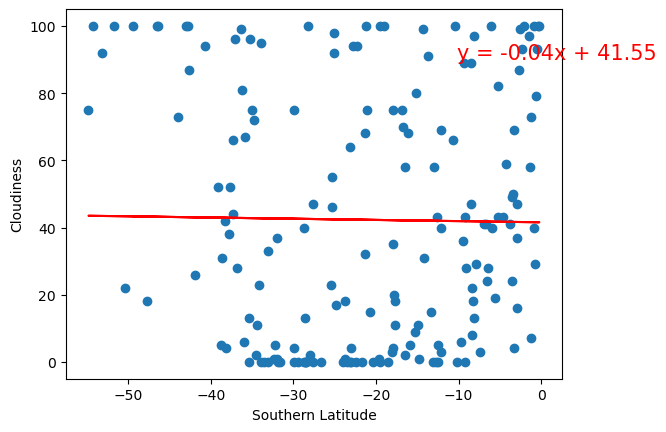

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP: Discussion of Relationship: There is a very weak relationship between the Cloudiness and Latitude with a correlation coefficient of -0.0135 on the Southern Latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12581403493302154


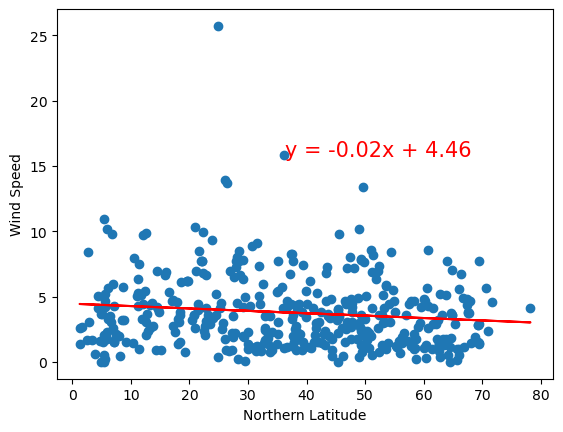

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='right')
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP:There is a very weak relationship between the Wind Speed and Latitude with a correlation coefficient of -0.1258 on the Northern Latitude.


The r-value is: -0.2696639871703912


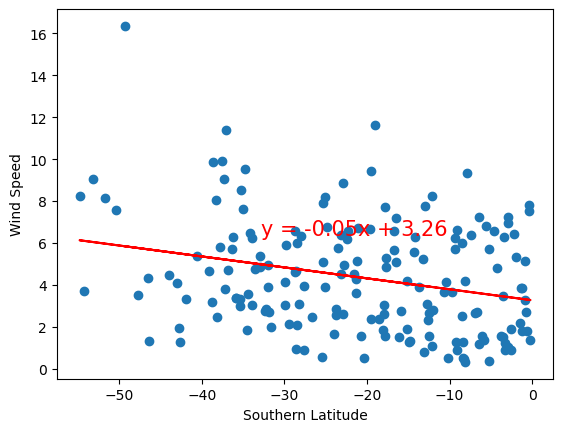

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='right')
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP:There is a moderate relationship between the Wind Speed and Latitude with a correlation coefficient of -0.2697 on the Northern Latitude.
